# Regresión lineal múltiple:

Realizare un ejercicio típico de regresión lineal múltiple utilizando datos de la NASA, los cuales buscaban determinar perfiles aerodinámicos ideales ante diferentes condiciones, dichas condiciones serán las variables x o independientes de nuestro sistema.

Se dividen los datos en datos de entrenamiento y de prueba, se encuentran las betas y se encuentran correlaciones y se jerarquizan, además la información se presenta de manera conveniente para entender los resultados del ejercicio.

Los datos fueron originalmente publicados por la NASA:  
https://ntrs.nasa.gov/api/citations/19890016302/downloads/19890016302.pdf  

Y fueron obtenidos de UCI MACHINE LEARNING REPOSITORY:
https://archive.ics.uci.edu/dataset/291/airfoil+self+noise  <p>

La base de datos cuenta con la siguiente información:<p>
* “frecuencia”. Frecuencia, en Hz.
* “longitud”. Longitud de cuerda geométrica, en metros.
* “velocidad”. Velocidad de flujo libre, en metros por segundo.
* “espesor”. Espesor del desplazamiento en el lado de succión, en metros.
* “presión”. Nivel escalado de presión sonora, en dB

Dichos datos fueron modificados para ser más fáciles de trabajar, si quieres replicar el código o verificar su funcionamiento puedes encontrar el archivo en este repositorio.


Empezaremos dando una introducción a los datos con los que estaremos trabajando.

In [251]:
#Importamos la libreria de pandas
import pandas as pd
#Abrimos la base de datos
df = pd.read_csv("data1_3.csv")
#Mostramos las dimensiones de dicha base de datos
print("Dimensiones de la base de datos:", df.shape)
#Imprimemos las primeras 15 filas para darnos una idea de los datos que manejamos
print("\nPre-view: \n")
print(df.head(15))

Dimensiones de la base de datos: (1503, 6)

Pre-view: 

    frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11       10000     0.0    0.3048       71.3  0.002663  115.391
12       12500     0.0    0.3048       71.3  0.002663  112.241
13       16000     0.0    0.3048       71.3  0.002663  108.721

Ahora usaremos una libreria especializada para separar nuestros datos en dos, los datos de prueba y los datos de entrenamiento, para así evitar el "overfitting" o un sobre-ajuste, en pocas palabras para evitar errores que se pueden dar al "forzar" mucho el modelo, puedes encontrar información más precisa de este concepto en internet. Los datos de entrenamiento se conforman por el 70% de la base de datos y el 30% restante para los datos de prueba.

In [252]:
#Importamos la funcion especializada
from sklearn.model_selection import train_test_split
#Usamos la funcion para dividir los datos como mencionamos anteriormente
train,test = train_test_split(df, train_size=0.7)

#Verificamos que sumen 1503, la cantidad total de datos
print("Total de ambas bases de datos =" ,train.shape[0]+test.shape[0])

Total de ambas bases de datos = 1503


Ahora utilizaremos otra libreria para entrenar a nuestro modelo, recordemos que buscamos predecir la variable de "presion", por lo cual es necesario eliminar esta columna de nuestra base de datos antes de realizar el entrenamiento.

In [253]:
#Importamos la libreria
import statsmodels.api as sm
#Generamos nuestros datos x
x = train.drop("presion", axis=1)
#Generamos nuestros datos y (Los resultados de la variable de presion)
y = train.presion

#Definimos al modelo usando OLS, agregamos add_constant, para agregar un beta0
model = sm.OLS(y,sm.add_constant(x))

#Ajustamos el modelo
results = model.fit()

print( "Resultados: ", results.summary())

Resultados:                              OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     223.1
Date:                Thu, 30 Jan 2025   Prob (F-statistic):          4.35e-162
Time:                        04:02:58   Log-Likelihood:                -3155.8
No. Observations:                1052   AIC:                             6324.
Df Residuals:                    1046   BIC:                             6353.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.5340      0.653    202

In [254]:
#Ahora veremos los valores p, ya que no son visibles en el sumario
print(results.pvalues)

const          0.000000e+00
frecuencia    8.310164e-114
angulo         5.925700e-16
longitud       4.235722e-62
velocidad      8.131317e-23
espesor        9.892321e-18
dtype: float64


In [255]:
print("Teniendo en cuenta estos datos, concluir que existen relaciones lineales ")
print("significativas con todas las variables que estamos tomando en cuenta ya que todos p<0.05. \n")
print("Un acercamiento para asignar un valor sobre las variables es revisando sus betas1, ")
print("podemos observar que la variable con mayor peso espesor, seguido de la longitud, ")
print("siendo estas dos las más relevantes, a manera personal, sin realizar un análisis de ")
print("error para comprobar mi hipótesis, diría que estas variables son las esenciales ya que ")
print("un modelo de 2 variables le brindarían al modelo mucha más interpretabilidad que ")
print("usar las 6 variables y añadir alguna de las variables restantes parece no ser muy relevante. \n")
print("Como podemos observar las variables de frecuencia, ángulo y velocidad tienen un ")
print("peso mucho menor en el modelo que las otras dos variables. \n")


Teniendo en cuenta estos datos, concluir que existen relaciones lineales 
significativas con todas las variables que estamos tomando en cuenta ya que todos p<0.05. 

Un acercamiento para asignar un valor sobre las variables es revisando sus betas1, 
podemos observar que la variable con mayor peso espesor, seguido de la longitud, 
siendo estas dos las más relevantes, a manera personal, sin realizar un análisis de 
error para comprobar mi hipótesis, diría que estas variables son las esenciales ya que 
un modelo de 2 variables le brindarían al modelo mucha más interpretabilidad que 
usar las 6 variables y añadir alguna de las variables restantes parece no ser muy relevante. 

Como podemos observar las variables de frecuencia, ángulo y velocidad tienen un 
peso mucho menor en el modelo que las otras dos variables. 



Ahora calcularé el RSE (Residual Standar Error) y la R^2 del modelo, para los datos de entrenamiento y los de prueba, para verificar que no se haya sobre-ajustado.

In [256]:
import numpy as np

#Obtenemos las prediciones sobre los datos de entrenamiento
yhat = results.predict(sm.add_constant(x))

#Calculamos el promedio de y
ybar = np.mean(y)

#Calculamos el RSS
RSS = sum((y-yhat)**2)

#Obtenemos el TSS
TSS = sum((y-np.mean(y))**2)

#Obtenemos el numero de datos de entrenamiento
nTrain = x.shape[0]

#Obtenemos el numero de variables de entrenamiento
mTrain = x.shape[1]

#Obtenemos el RSE
RSE = np.sqrt(RSS/(nTrain-mTrain-1))

#Obtenemos R^2
R2 = 1 - RSS/TSS

print("RSE de los datos del entrenamiento = ", RSE)
print("R2 de los datos del entrenamiento = ", R2)



RSE de los datos del entrenamiento =  4.8729270450045
R2 de los datos del entrenamiento =  0.5161309708248678


Comprobamos los resultados de la funcion para los datos de entrenamiento, ahora lo haremos para los datos de prueba.

In [257]:
#Generamos el vector X para los datos de prueba
xTest = test.drop("presion", axis = 1)

#Generamos las predicciones para los datos de prueba
yhatTest = results.predict(sm.add_constant(xTest))

#Generamos el vector de los valores reales de y para los datos de prueba
yTest = test.presion

#Calculamos el promedio de y
ybarTest = np.mean(yTest)

#Calculamos el RSS
RSSTest = sum((yTest-yhatTest)**2)

#Obtenemos el TSS
TSSTest = sum((yTest-np.mean(yTest))**2)

#Obtenemos el numero de datos de entrenamiento
nTest = xTest.shape[0]

#Obtenemos el numero de variables de entrenamiento
mTest = xTest.shape[1]

#Obtenemos el RSE
RSETest = np.sqrt(RSSTest/(nTest-mTest-1))

#Obtenemos R^2
R2Test = 1 - RSSTest/TSSTest

print("RSE de los datos de prueba = ", RSETest)
print("R2 de los datos de prueba = ", R2Test)

print("Diferencia entre R^2 de los datos de prueba y de entrenamiento =", abs(R2-R2Test))

RSE de los datos de prueba =  4.695613669105554
R2 de los datos de prueba =  0.5122211120626121
Diferencia entre R^2 de los datos de prueba y de entrenamiento = 0.003909858762255691


Podemos generar una hipotesis viendo esos resultados, mi hipotesis es que el modelo no esta sobre-ajustado.

Ahora generemos una grafica para visualizar los resultados de mejor manera, tendremos una grafica de dispersion donde podremos observar los valores reales de "y" (la presion) y los valores predichos de "y" junto con una linea con pendiente 1 de referencia para saber como se vería un resultado ideal.

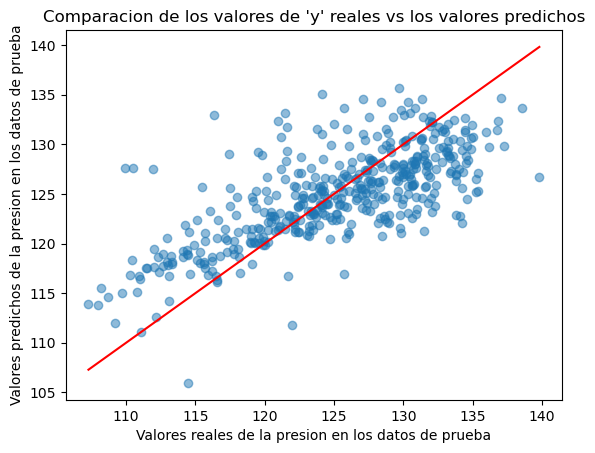

In [258]:
#Sirve para que las graficas sean compatibles con jupyter notebook
%matplotlib inline

#Importamos la libreria
import matplotlib.pyplot as plt

#Notas
plt.scatter(x = yTest,y = yhatTest, alpha= 0.5)
plt.xlabel("Valores reales de la presion en los datos de prueba")
plt.ylabel("Valores predichos de la presion en los datos de prueba")
plt.title("Comparacion de los valores de 'y' reales vs los valores predichos")

#Linea con pendiente de 1, este sería el recorrido si nuestro modelo fuera ideal
plt.plot([min(yTest), max(yTest)], [min(yTest), max(yTest)], color="red", linestyle="-")

#Mostramos la grafica
plt.show()

Agradezco su tiempo al lector: <p>
-Armando Rdz